In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
digits = load_digits()
X, y = digits.data, digits.target
print("Shape of X:", X.shape)
print("Number of classes:", len(np.unique(y)))

Shape of X: (1797, 64)
Number of classes: 10


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

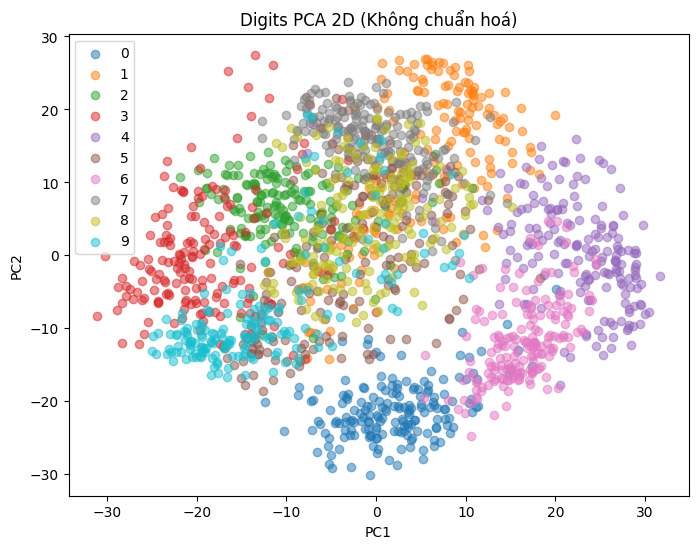

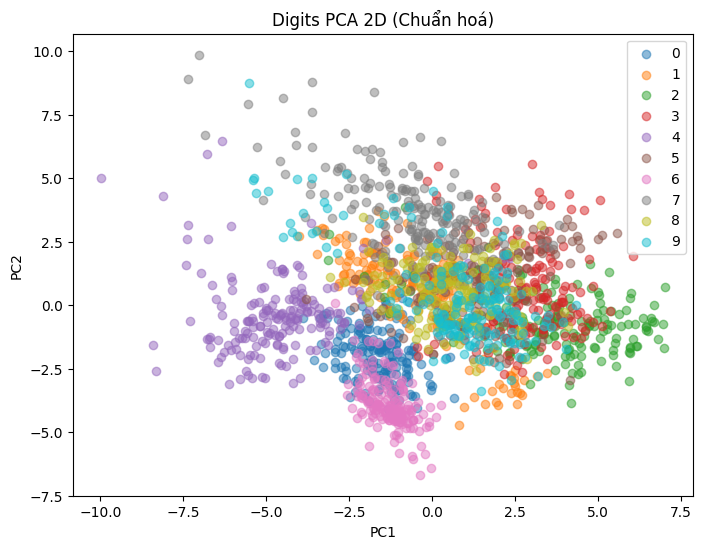

In [16]:
def plot_pca_2d(X_data, title):
    pca2 = PCA(n_components=2)
    X_pca2 = pca2.fit_transform(X_data)
    plt.figure(figsize=(8,6))
    for i in range(10):
        plt.scatter(X_pca2[y==i,0], X_pca2[y==i,1], alpha=0.5, label=str(i))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.legend()
    plt.show()


plot_pca_2d(X, "Digits PCA 2D (Không chuẩn hoá)")


plot_pca_2d(X_scaled, "Digits PCA 2D (Chuẩn hoá)")

In [17]:

def pca_logreg_accuracy(X_data, y, ks=[5,10,20,30]):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
    acc_list = []
    for k in ks:
        pca_k = PCA(n_components=k)
        X_train_k = pca_k.fit_transform(X_train)
        X_test_k = pca_k.transform(X_test)
        
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train_k, y_train)
        y_pred = clf.predict(X_test_k)
        acc = accuracy_score(y_test, y_pred)
        acc_list.append(acc)
        print(f"k={k}, Accuracy={acc:.4f}")
    return ks, acc_list

print("\n--- Logistic Regression trên dữ liệu gốc ---")
ks, acc_orig = pca_logreg_accuracy(X, y)

print("\n--- Logistic Regression trên dữ liệu chuẩn hoá ---")
ks, acc_scaled = pca_logreg_accuracy(X_scaled, y)


--- Logistic Regression trên dữ liệu gốc ---
k=5, Accuracy=0.8778
k=10, Accuracy=0.9333
k=20, Accuracy=0.9528
k=30, Accuracy=0.9722

--- Logistic Regression trên dữ liệu chuẩn hoá ---
k=5, Accuracy=0.8139
k=10, Accuracy=0.8833
k=20, Accuracy=0.9417
k=30, Accuracy=0.9639


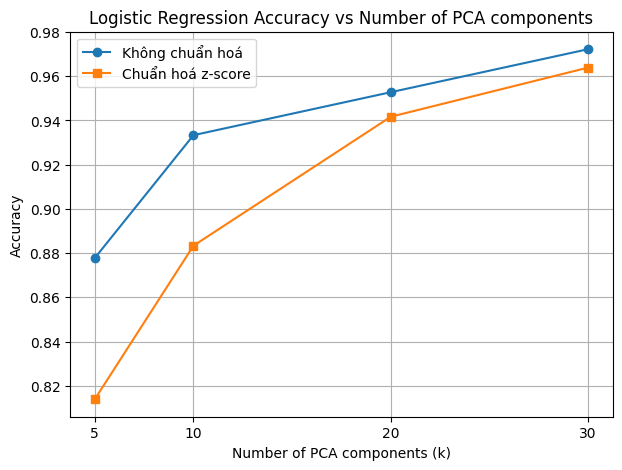


Nhận xét:
1. Accuracy thường tăng khi k tăng, vì giữ nhiều phương sai → nhiều thông tin phân loại hơn.
2. Chuẩn hoá dữ liệu giúp cân bằng ảnh hưởng của các feature, đôi khi cải thiện accuracy, đặc biệt khi feature có thang đo khác nhau.


In [18]:
plt.figure(figsize=(7,5))
plt.plot(ks, acc_orig, marker='o', label='Không chuẩn hoá')
plt.plot(ks, acc_scaled, marker='s', label='Chuẩn hoá z-score')
plt.xlabel("Number of PCA components (k)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy vs Number of PCA components")
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.show()


print("\nNhận xét:")
print("1. Accuracy thường tăng khi k tăng, vì giữ nhiều phương sai → nhiều thông tin phân loại hơn.")
print("2. Chuẩn hoá dữ liệu giúp cân bằng ảnh hưởng của các feature, đôi khi cải thiện accuracy, đặc biệt khi feature có thang đo khác nhau.")